# **Topic Modeling Fenomena Sound Horeg yang tengah Viral**

Data diambil dari komentar video youtube Steaven Young dan Volix Media yang membahas tentang fenomena sound Horeg. Berikut linknya:
<ul>
<li><a href="https://youtu.be/PpWz7_nQ2bs?si=100qrBr8thRYEjSp">Steaven Young</a></li>
<li><a href="https://youtu.be/S7Bj0F88Iys?si=to3Dx5MEs5-JiSmD">Volix Media</a></li>
</ul>

## **Import Required Library**

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import pickle
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA, LatentDirichletAllocation
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud

In [2]:
nltk.download('stopwords')
stopwords_id = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Load Data**

In [3]:
df = pd.read_csv('raw/raw_and_label.csv')
df = df.drop(columns=['username', 'Sentimen'])
df.head()

,komentar
0,"anehnya pecinta sound horeg, kalau pakai genre..."
1,"maaf kak, acara sound horeg itu juga melalui j..."
2,Pro: kalau digunakan di tempat lapang\nKontra:...
3,"Gua sesuka apapun sama suatu lagu, gua selalu ..."
4,"Betul ini mah, di desaku yang kemarin sama kep..."


## **Explore Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   komentar  500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [5]:
df.isna().sum()

komentar    0
dtype: int64

## **Preprocessing Data**

### **Case Folding**

In [6]:
df.komentar = df.komentar.apply(lambda x: x.lower())

### **Removing URLs**

In [7]:
def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

df.komentar = df.komentar.apply(lambda x: remove_url(x))

### **Removing Numbers**

In [8]:
def remove_number(text):
    numb = re.compile(r'\b\d+\b')
    return numb.sub(r'', text)

df.komentar = df.komentar.apply(lambda x: remove_number(x))

### **Convert Istilah Asing**

In [9]:
def convert_asing(text):
    list_asing = {'sound':'suara'}
    list_word = []
    sentences = text.split()
    for word in sentences:
        if word in list_asing.keys():
            list_word.append(list_asing[word])
        else:
            list_word.append(word)
    return " ".join(list_word)

df.komentar = df.komentar.apply(lambda x: convert_asing(x))

### **Removing Punctuations**

In [10]:
def remove_punct(text):
  table = str.maketrans('','',string.punctuation)
  return text.translate(table)

df.komentar = df.komentar.apply(lambda x: remove_punct(x))

### **Removing Stopwords**

In [11]:
def remove_stopwords(text):
    list_word = []
    sentences = text.split()
    for word in sentences:
        if word.strip() not in stopwords_id and word is not ' ' and len(word.strip())>3:
            list_word.append(word.strip())
    return " ".join(list_word)

df.komentar = df.komentar.apply(lambda x: remove_stopwords(x))

<>:5: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
C:\Users\User\AppData\Local\Temp\ipykernel_10484\715363257.py:5: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if word.strip() not in stopwords_id and word is not ' ' and len(word.strip())>3:


### **Stemming using Sastrawi**

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_word(text):
    return stemmer.stem(text)

df.komentar = df.komentar.apply(lambda x: stemming_word(x))

### **Tokenizing**

In [13]:
vectorizer = TfidfVectorizer() 
countsv = vectorizer.fit_transform(df.komentar)

## **Cari Jumlah Clustering Terbaik**

For n_clusters = 2 The average silhouette_score is : 0.00917454682633387
For n_clusters = 3 The average silhouette_score is : 0.0037605899484855175
For n_clusters = 4 The average silhouette_score is : 0.00456831142873437
For n_clusters = 5 The average silhouette_score is : 0.0059138830733992676
For n_clusters = 6 The average silhouette_score is : 0.007423748856064025
For n_clusters = 7 The average silhouette_score is : 0.010187650290070831
For n_clusters = 8 The average silhouette_score is : 0.008252602899650815
For n_clusters = 9 The average silhouette_score is : 0.008357220245209039
For n_clusters = 10 The average silhouette_score is : 0.008391177556428864
For n_clusters = 11 The average silhouette_score is : 0.008908842390606716
For n_clusters = 12 The average silhouette_score is : 0.010051671884689549
For n_clusters = 13 The average silhouette_score is : 0.011219943606184045
For n_clusters = 14 The average silhouette_score is : 0.011540050810641321
For n_clusters = 15 The average s

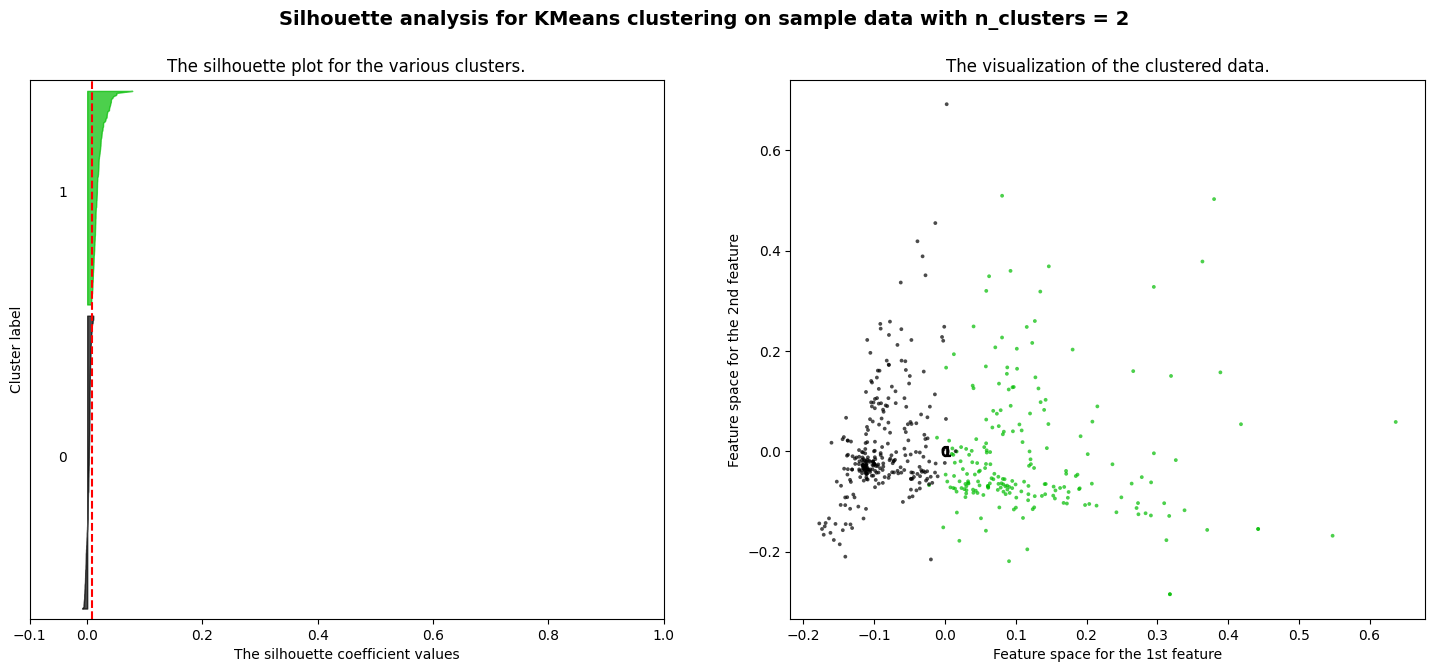

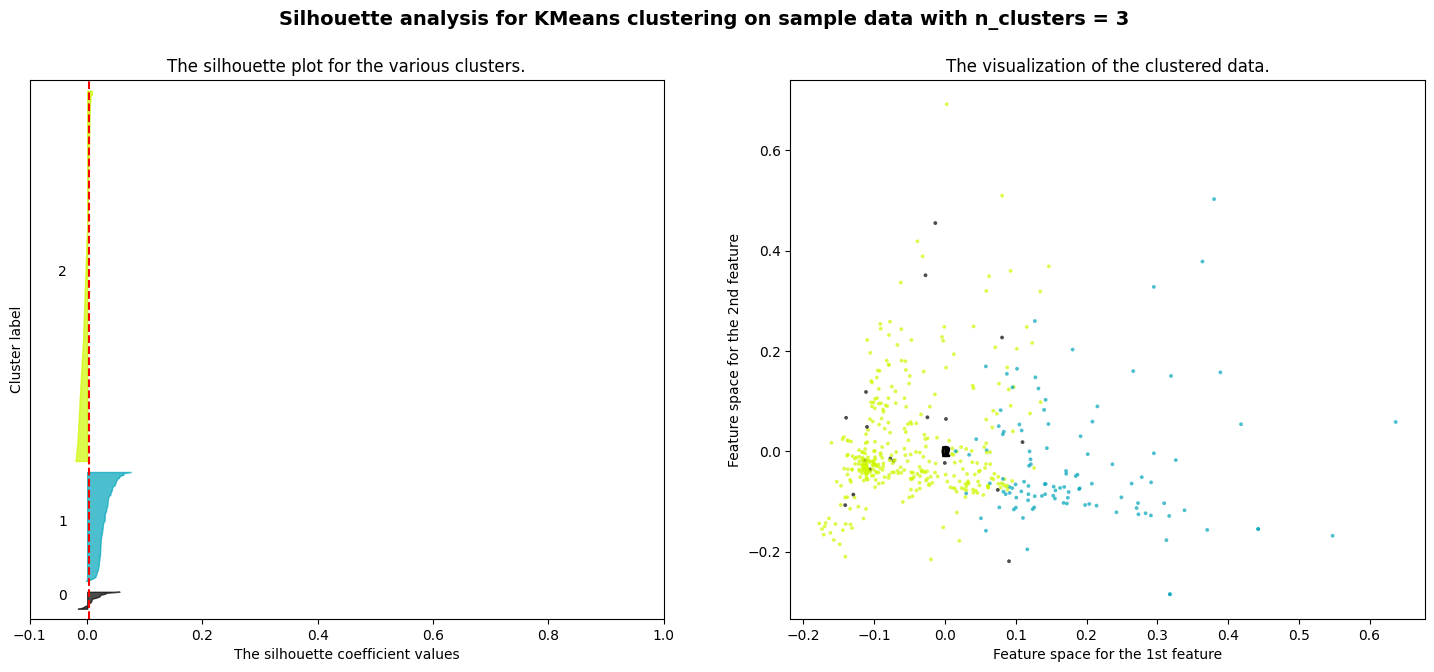

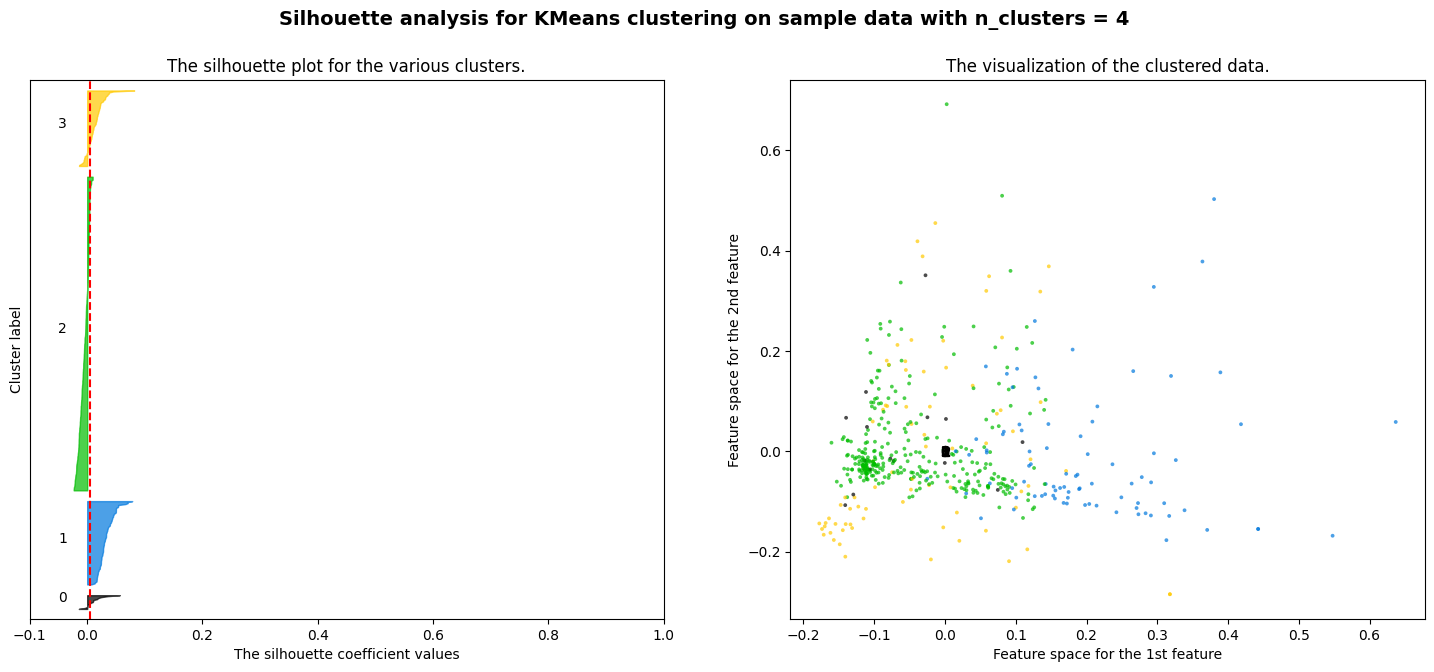

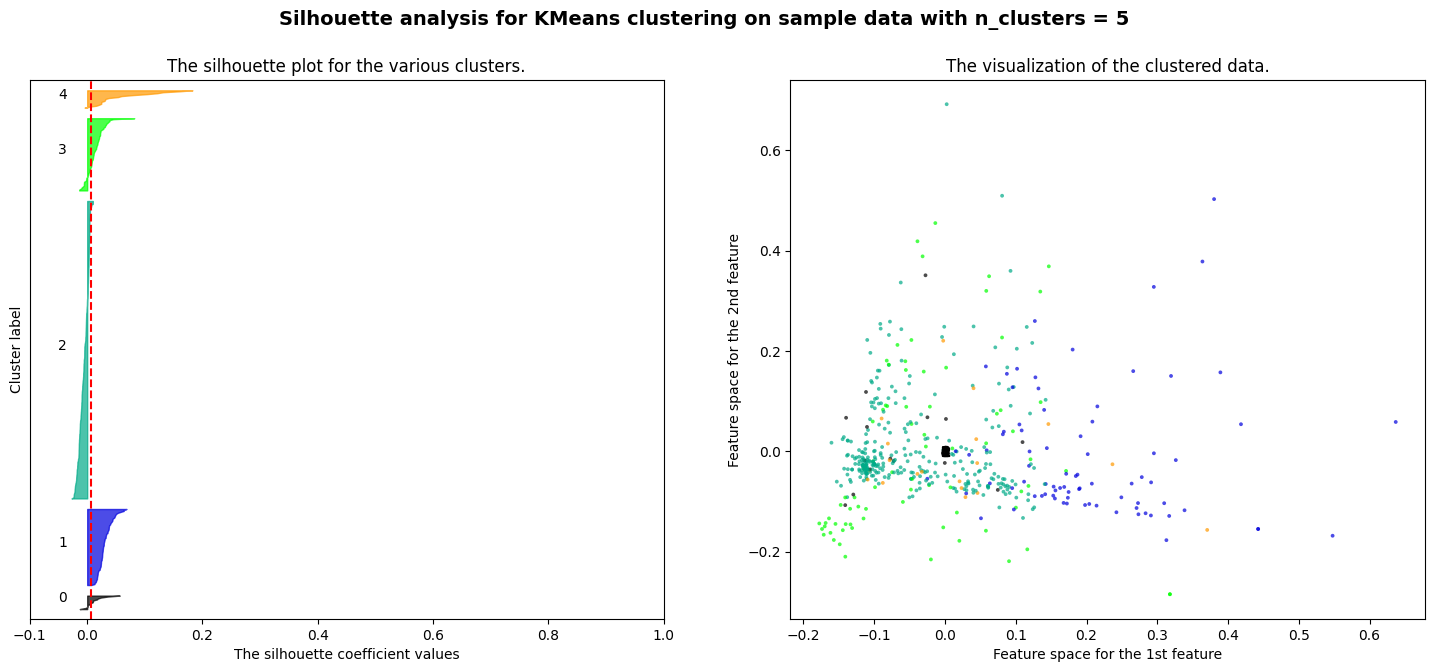

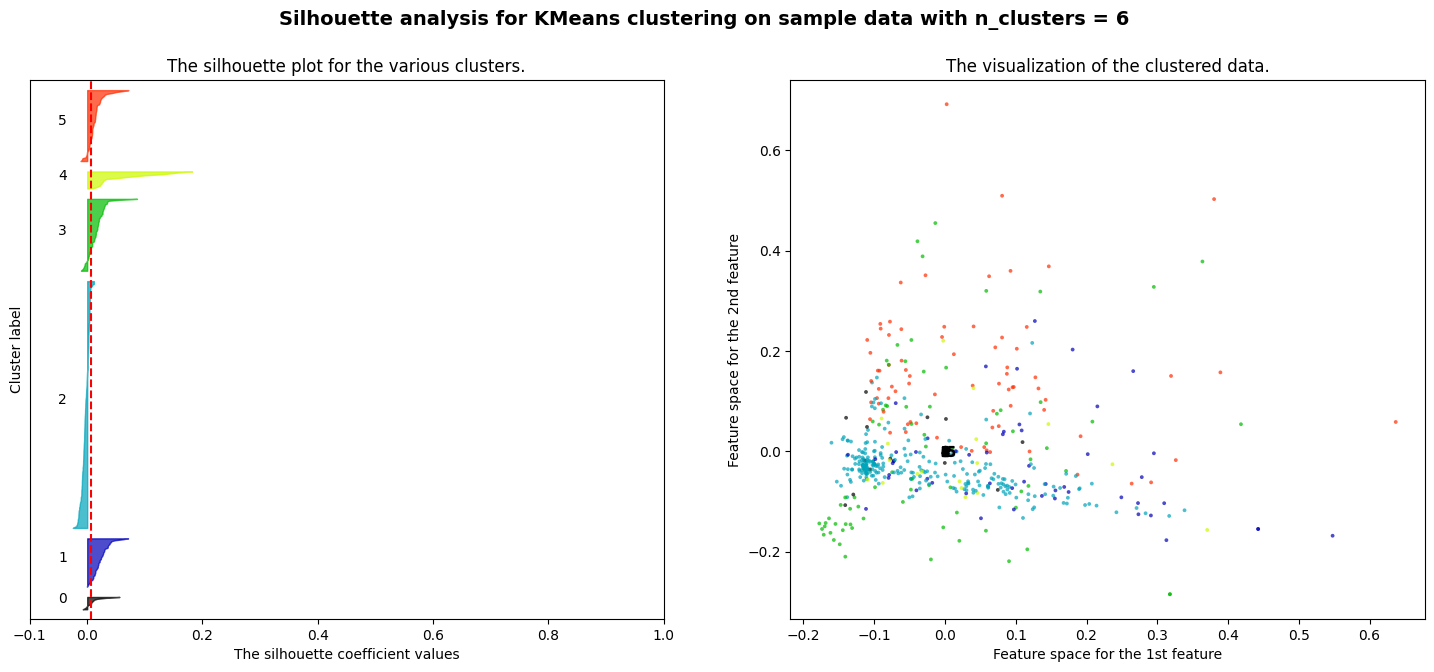

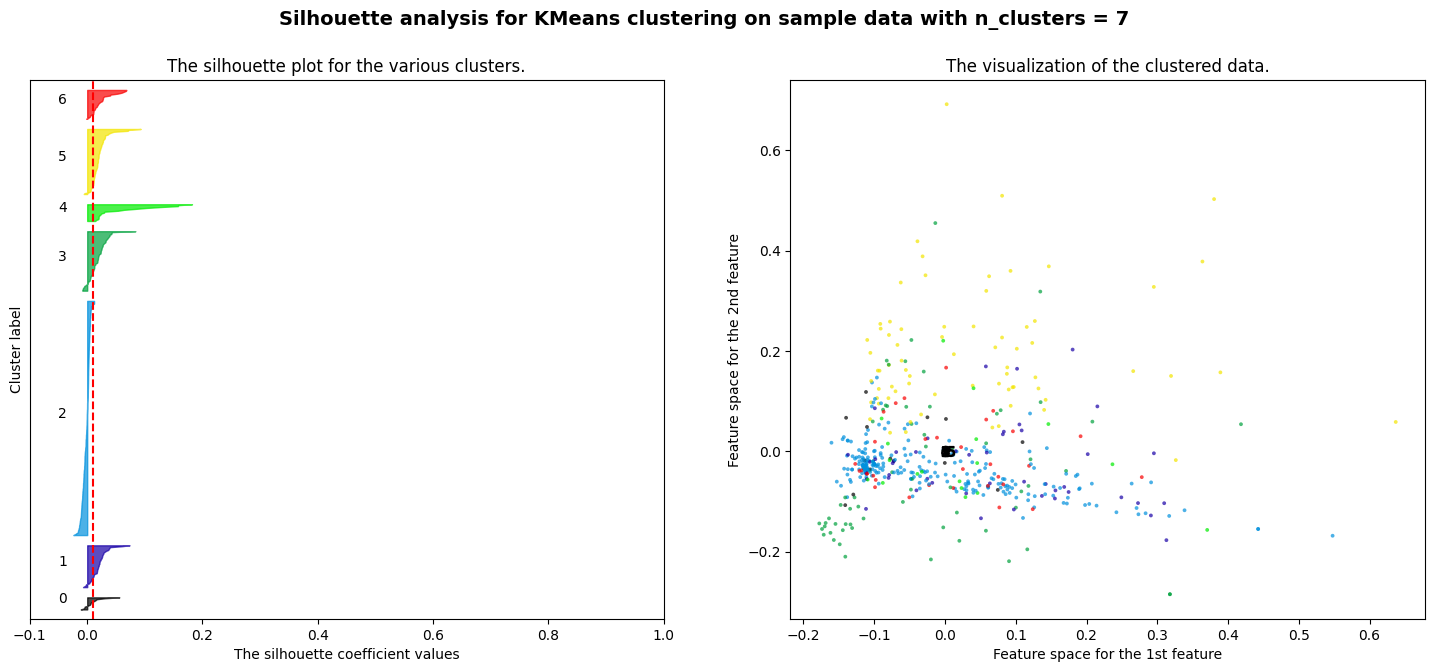

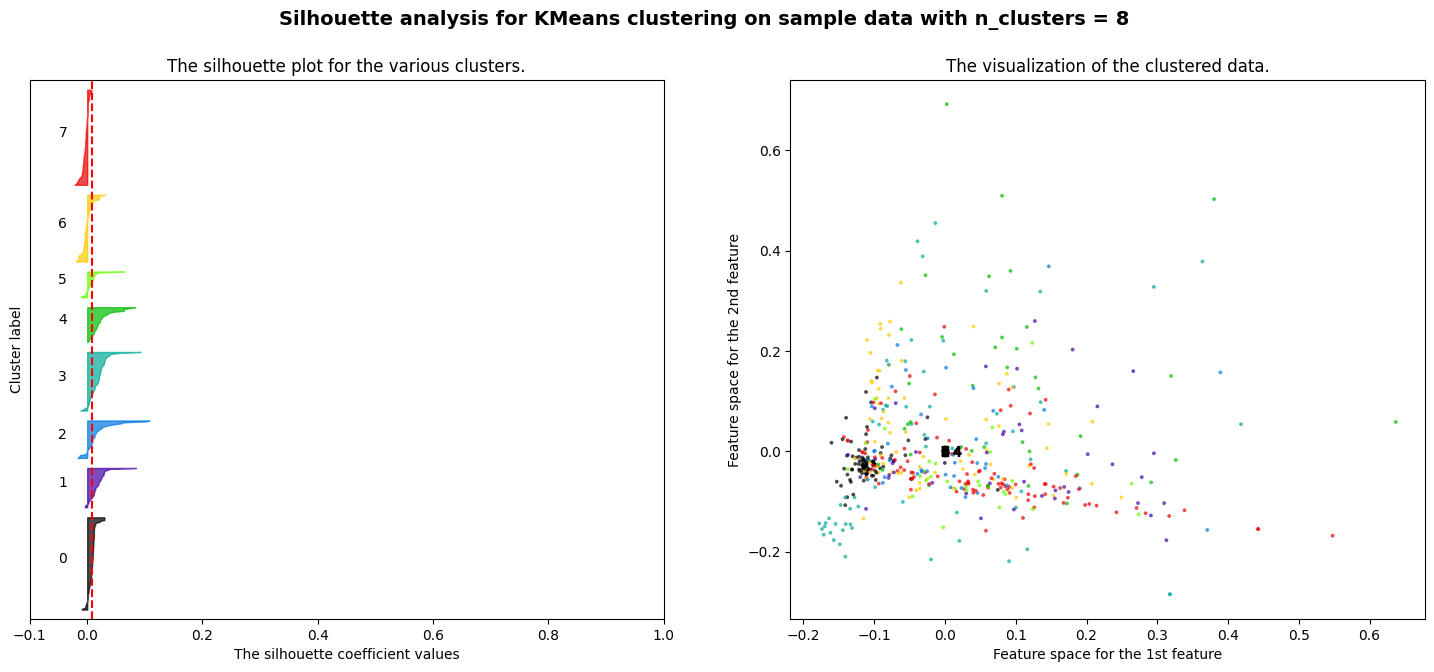

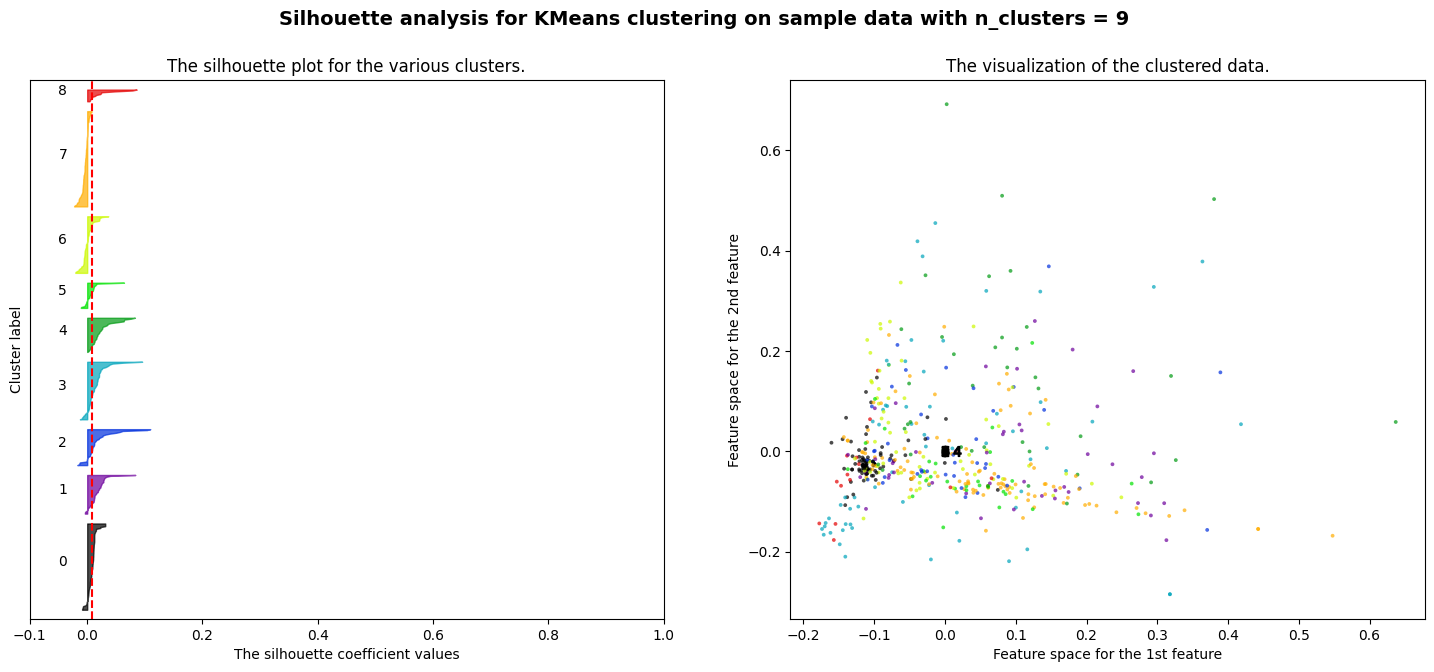

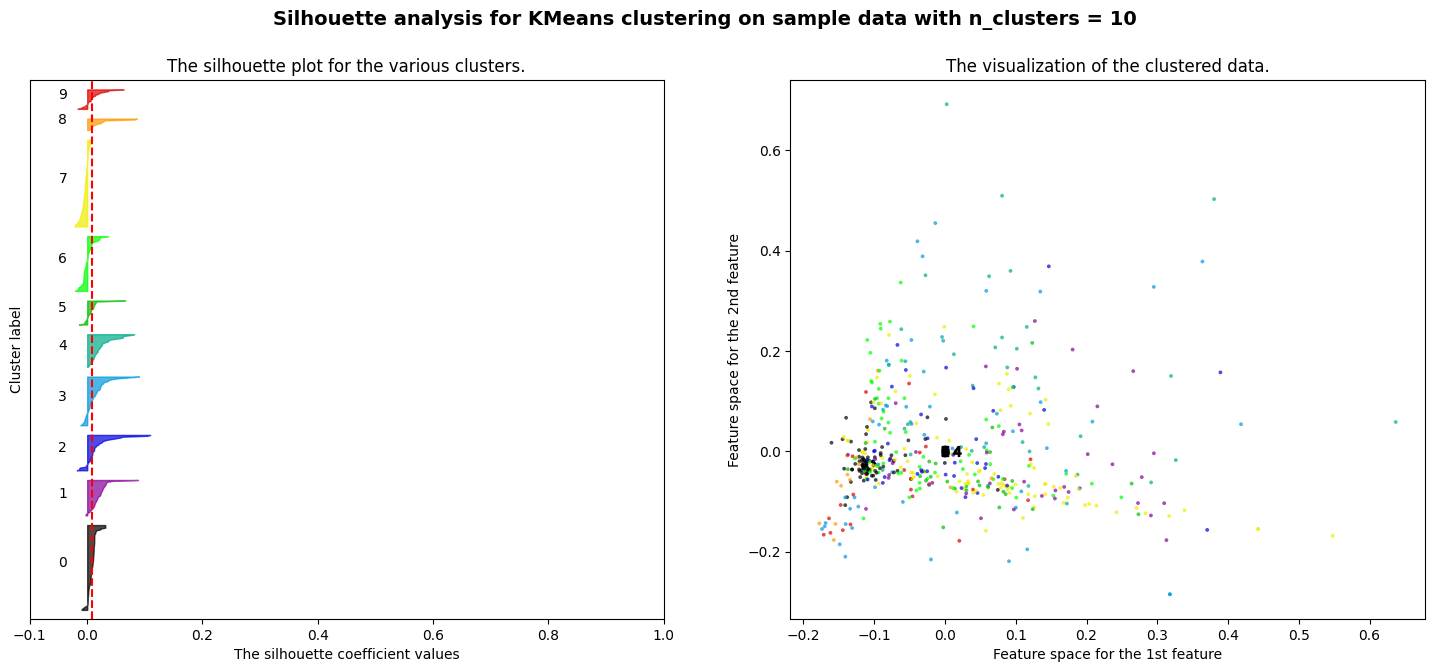

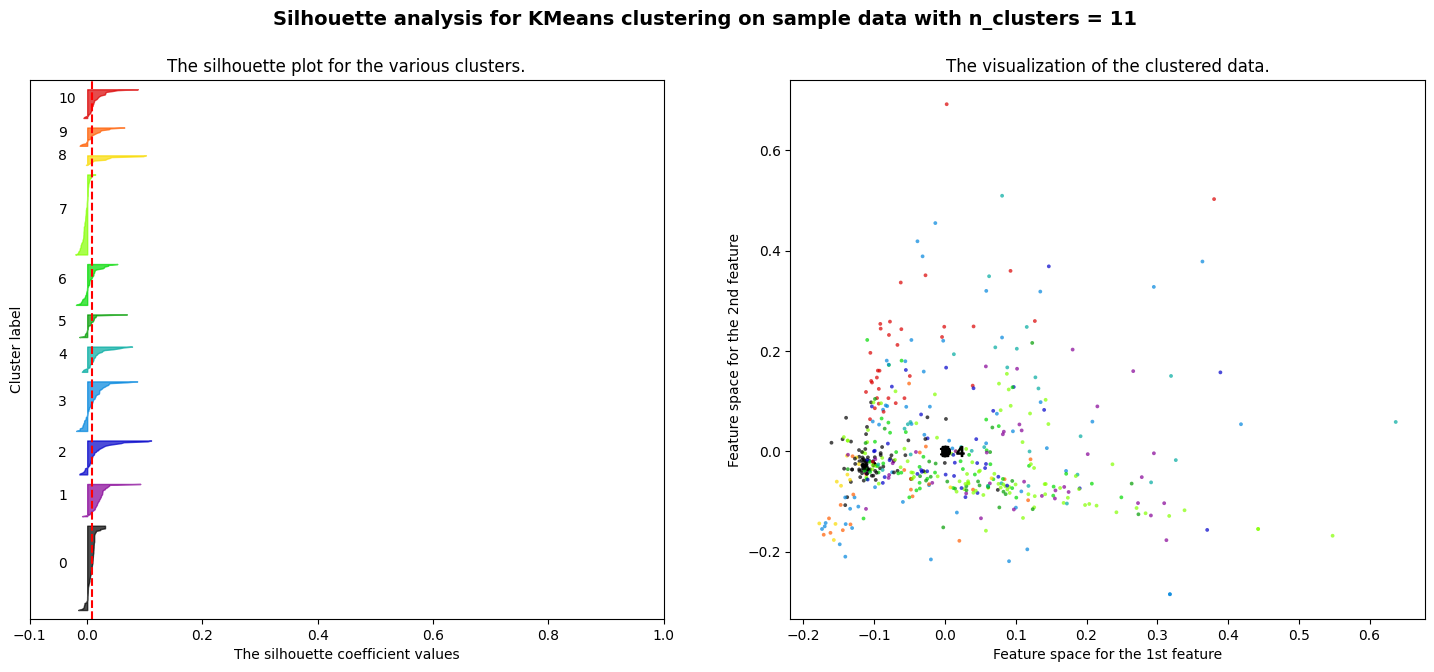

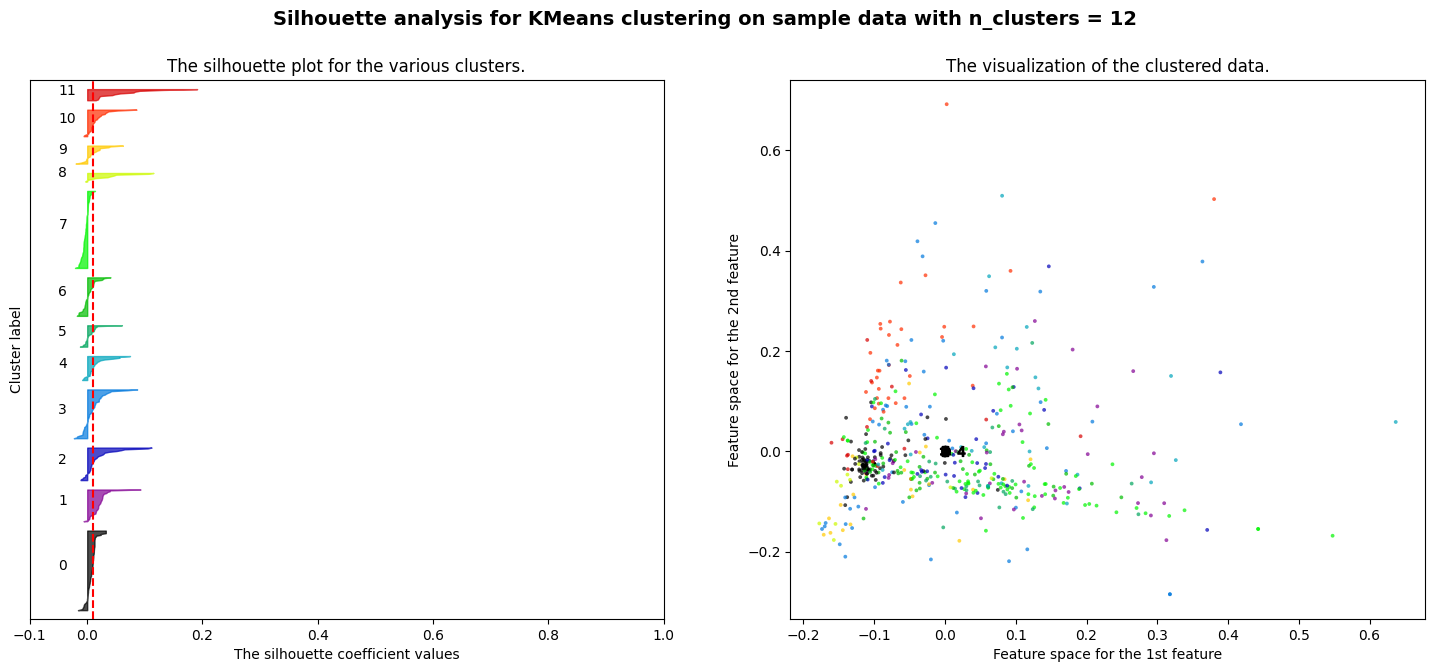

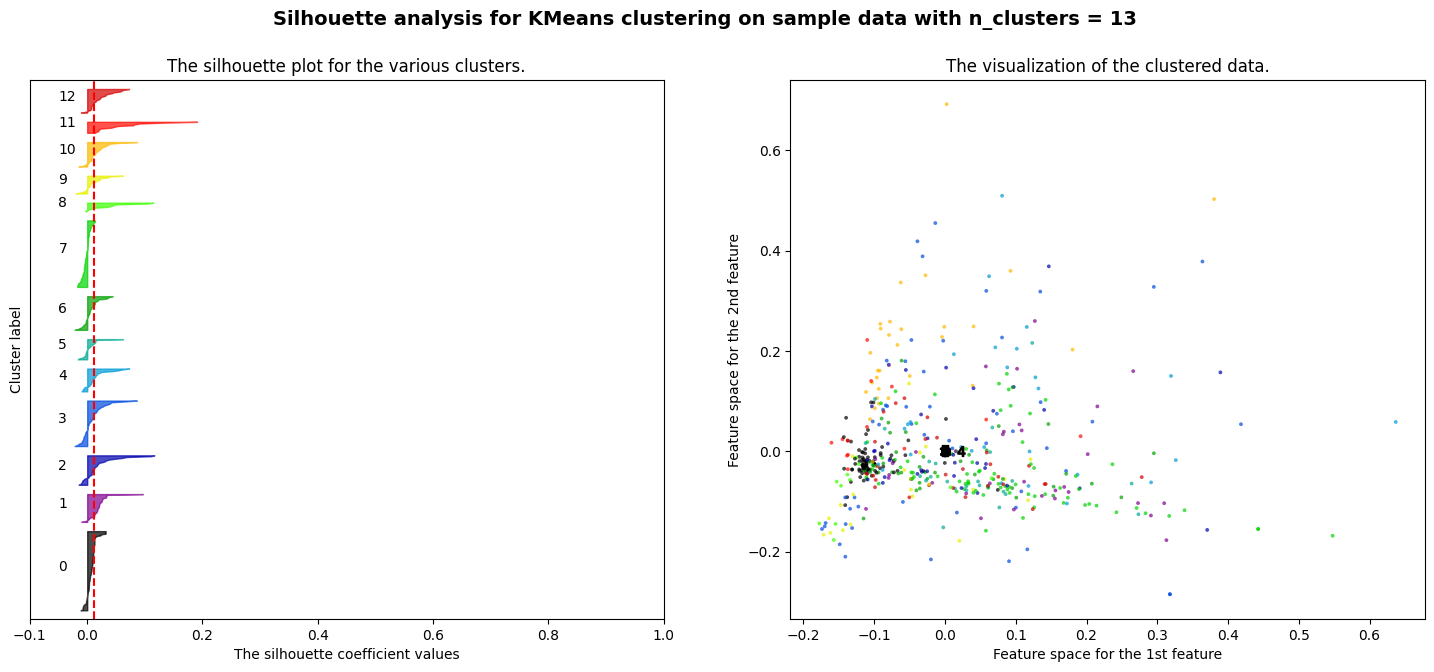

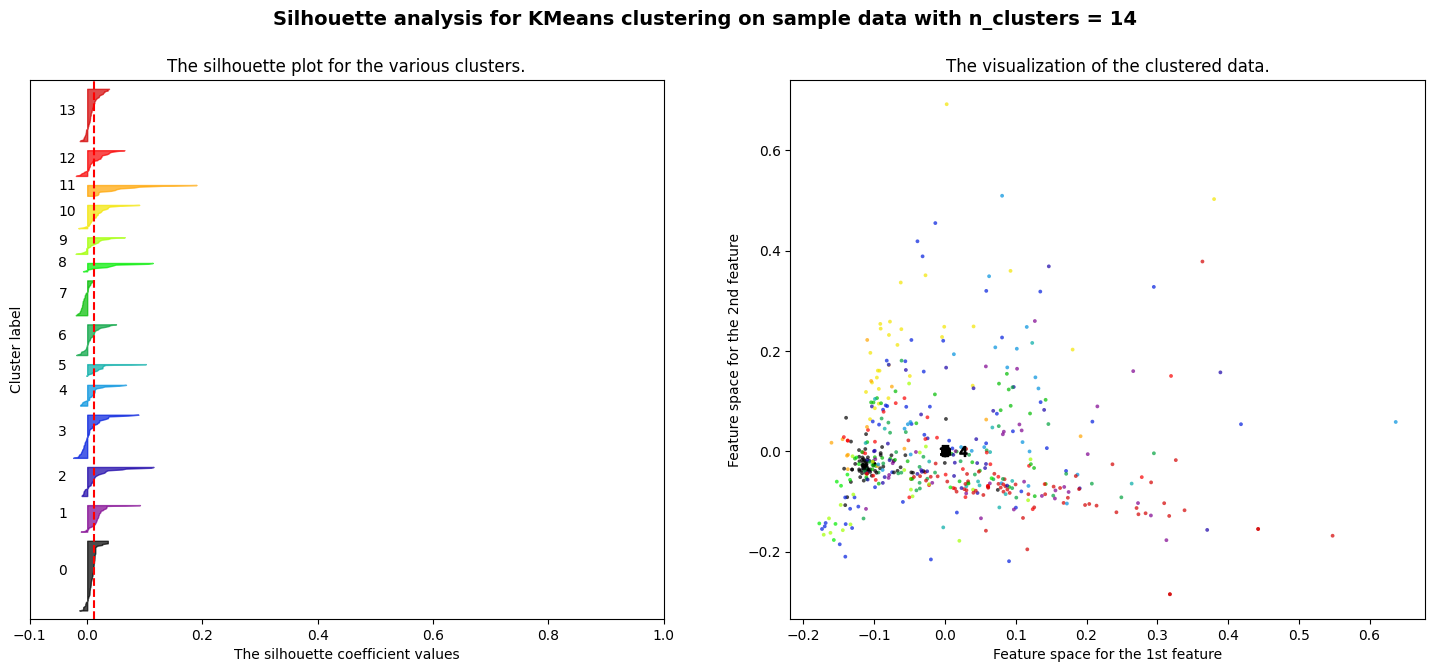

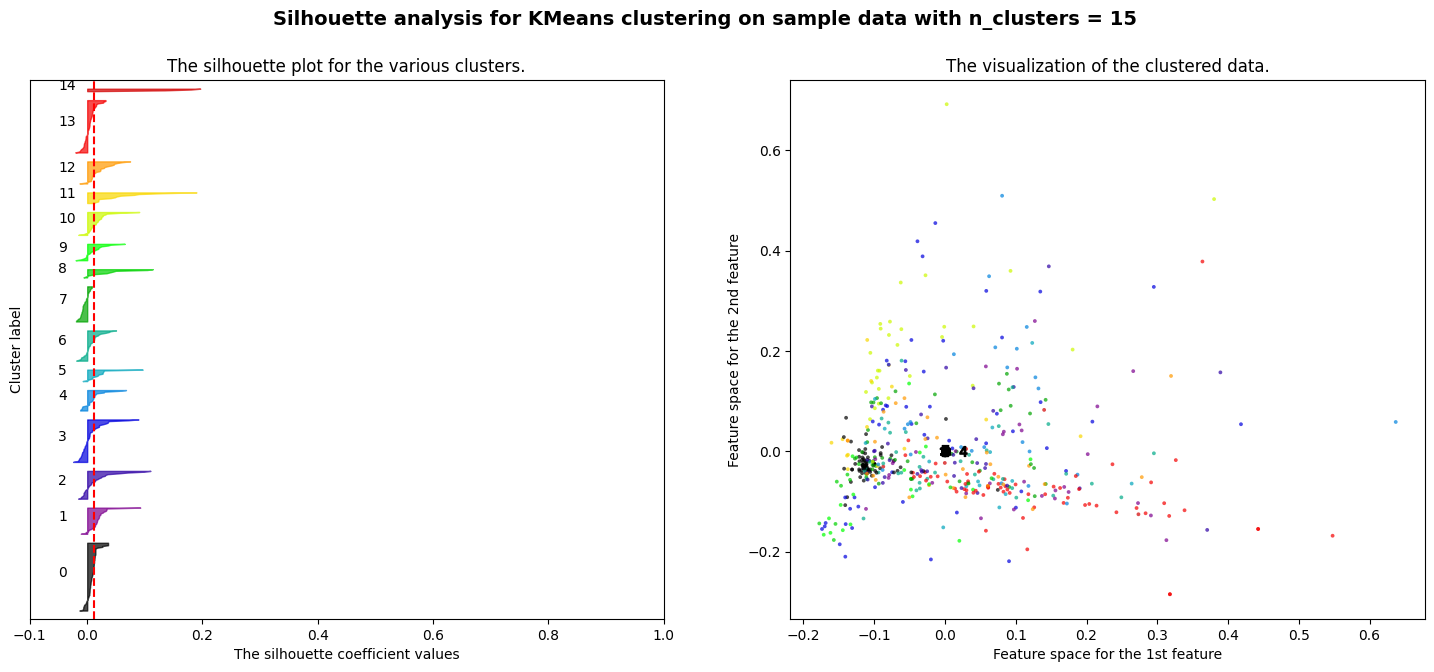

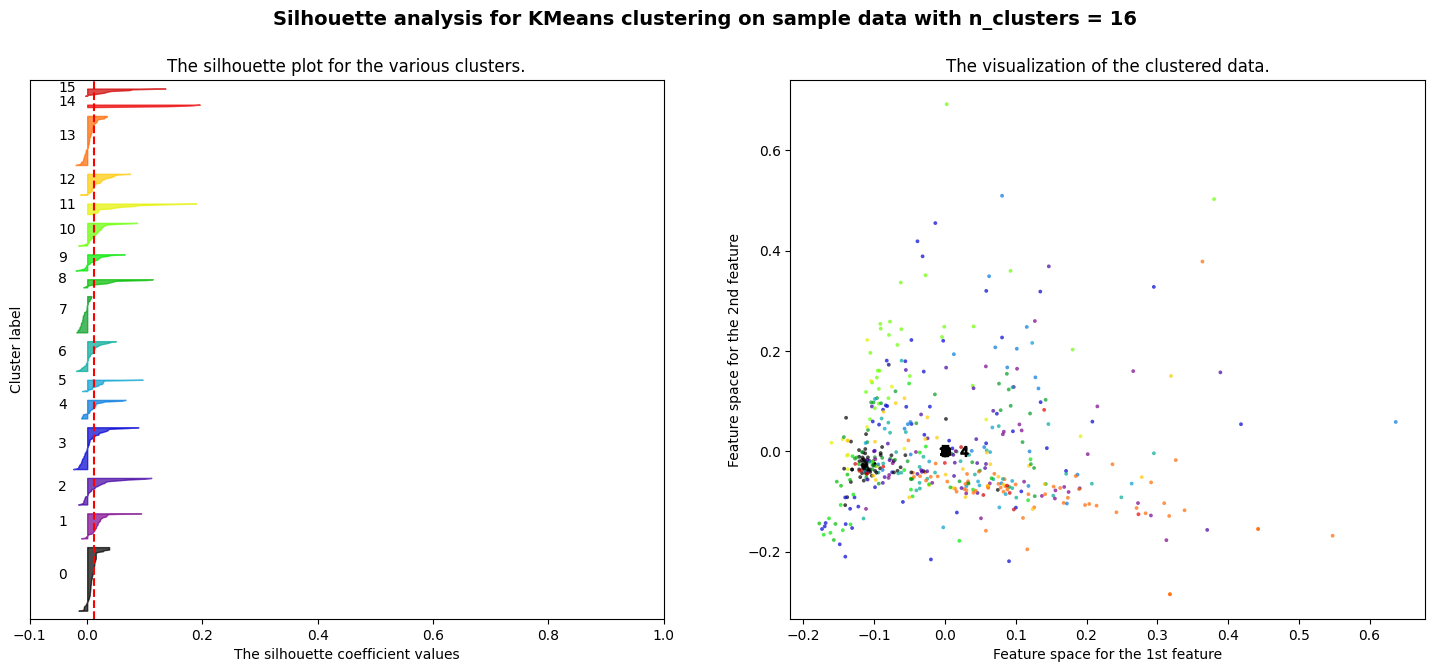

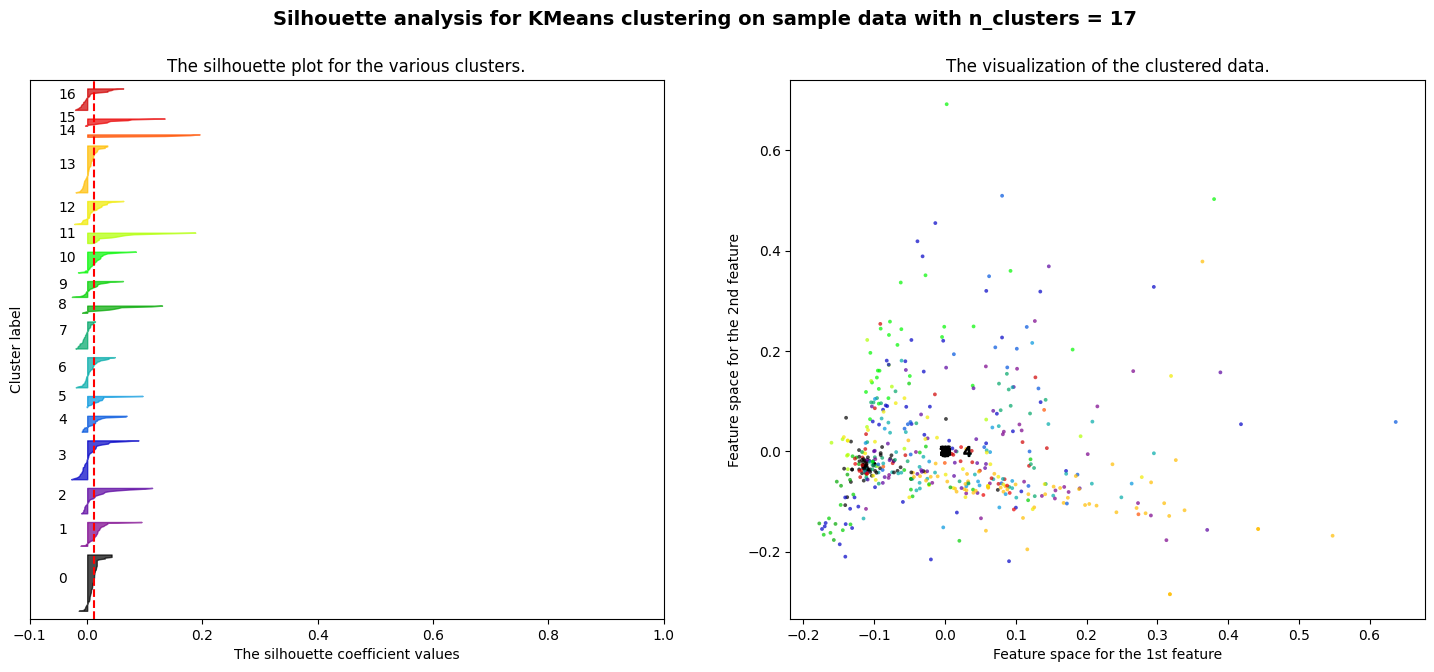

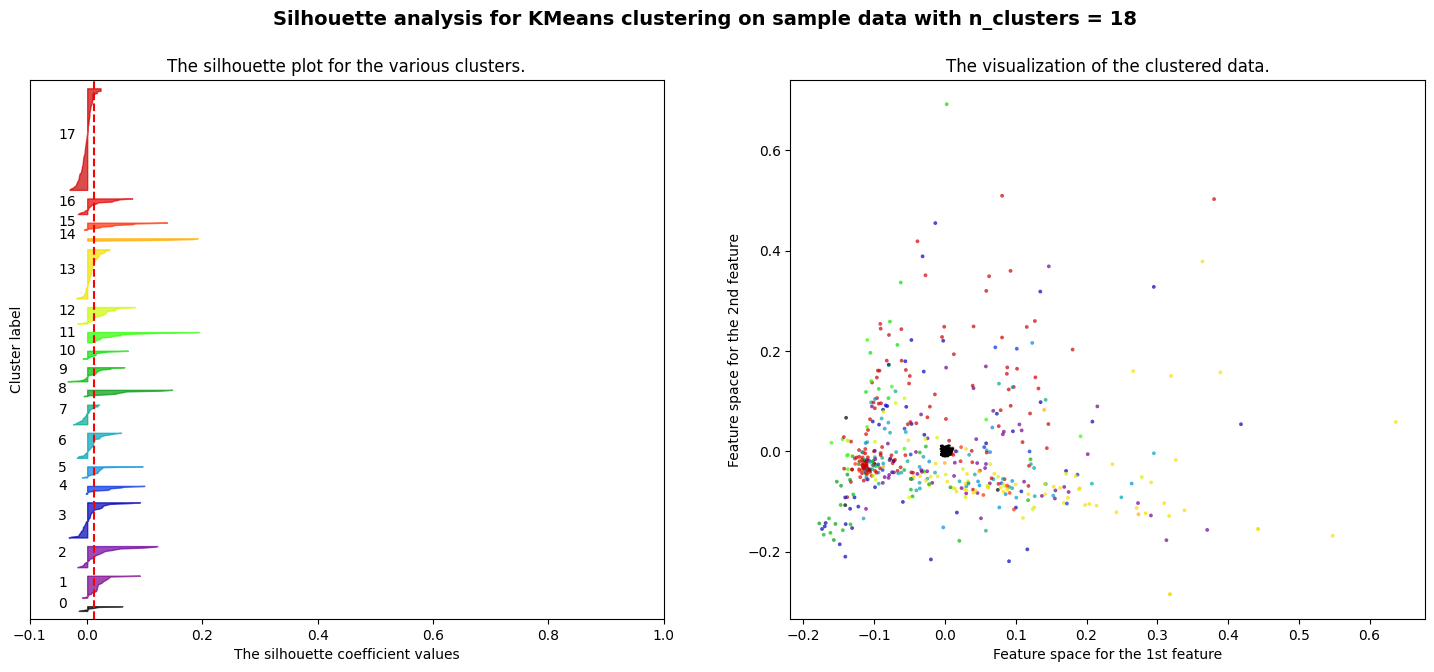

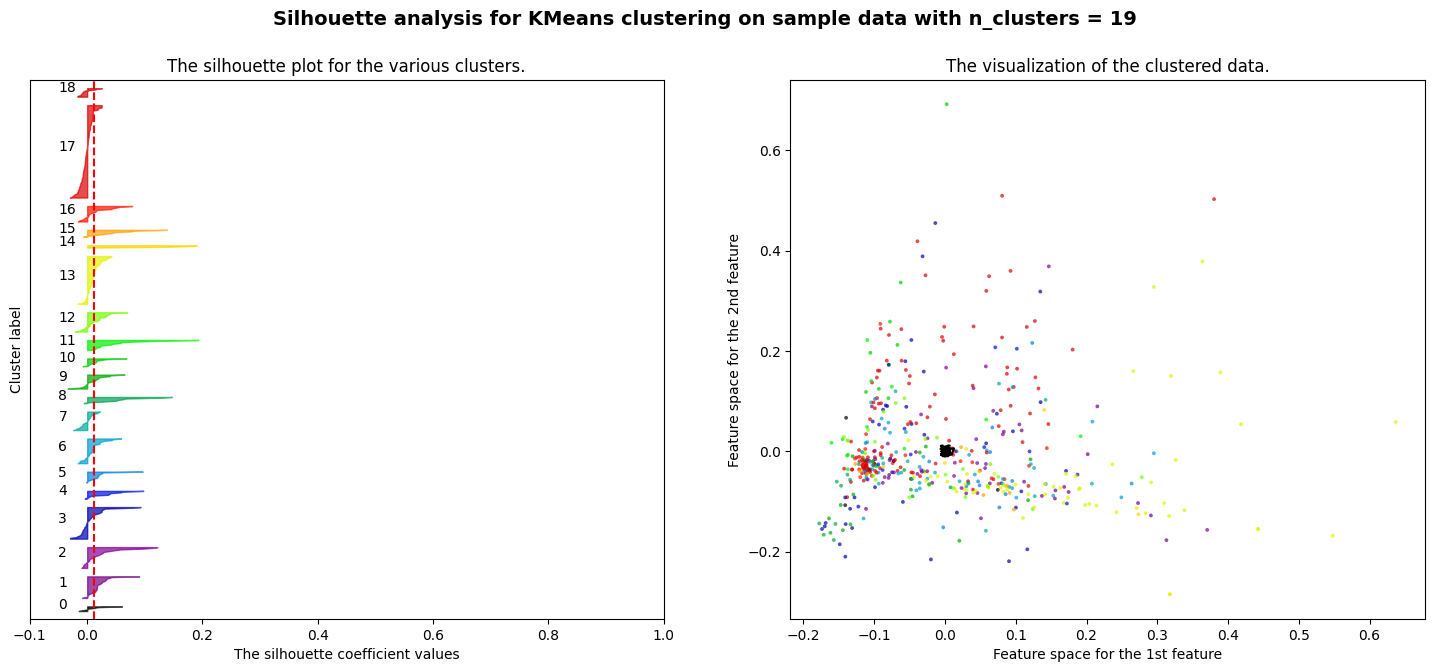

In [14]:
# Reduksi dimensi ke 2 untuk scatter plot
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(countsv.toarray())
true_k = 0
temp = 0

for n_clusters in range(2, 20):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df.komentar) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(countsv)

    silhouette_avg = silhouette_score(countsv, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(countsv, cluster_labels)
    if n_clusters == 2:
        true_k = n_clusters
        temp = silhouette_avg
    else:
        if silhouette_avg > temp:
            true_k = n_clusters
            temp = silhouette_avg

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                          ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(reduced_features[:, 0], reduced_features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, 
                    s=50, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

plt.show()


In [15]:
print(f'Jumlah cluster terbaik yang didapatkan sebesar: {true_k}\ndengan average silhouette_score: {temp}')

Jumlah cluster terbaik yang didapatkan sebesar: 16
dengan average silhouette_score: 0.012394132231081713


Di bawah ini cara lain untuk menentukan cluster terbaik.

In [16]:
# true_k = 0
# temp = 0
# for i in range(2, 20):
#     model = KMeans(n_clusters=i, random_state=1)
#     cluster_labels = model.fit_predict(countsv)
#     silhouette_avg = silhouette_score(countsv, cluster_labels)    
#     print("For n_clusters =", i,          
#           "The average silhouette_score is :", silhouette_avg)
#     if i == 2:
#         true_k = i
#         temp = silhouette_avg
#     else:
#         if silhouette_avg > temp:
#             true_k = i
#             temp = silhouette_avg

## **Model & Training**

In [17]:
model = KMeans(n_clusters=2, random_state=1, init="k-means++", max_iter=100, n_init=1)

In [18]:
model.fit(countsv)

KMeans(max_iter=100, n_clusters=2, n_init=1, random_state=1)

In [19]:
cluster_result = model.predict(countsv)
cluster_result

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,

### **Silhouette Score**

In [20]:
silhouette_avg = silhouette_score(countsv, cluster_result)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.00917454682633387


## **Cluster Distribution**

In [21]:
distribusi_cluster = Counter(cluster_result)
distribusi_cluster

Counter({0: 289, 1: 211})

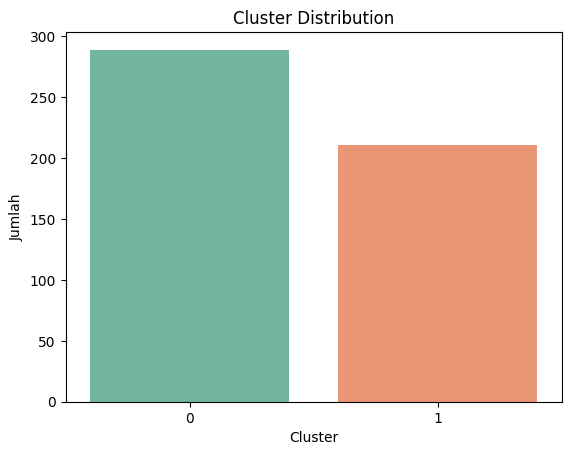

In [22]:
x = distribusi_cluster.keys()
y = distribusi_cluster.values()
bar = sns.barplot(x=x, y=y, palette='Set2', hue=x, legend=False)
plt.gca().set_title('Cluster Distribution')
plt.gca().set_xlabel('Cluster')
plt.gca().set_ylabel('Jumlah')
plt.show()

## **Word Cloud**

In [23]:
def word_cloud(cluster):
    for i in cluster_result:
        if i == cluster: 
            corpus_text = " ".join(df.komentar[i].split())
    wc = WordCloud(background_color="white", max_words=200,
               stopwords=stopwords_id, max_font_size=90,
               random_state=42)
    wc.generate(corpus_text)
    plt.title(f"Cluster {cluster}")
    plt.imshow(wc)
    plt.show()

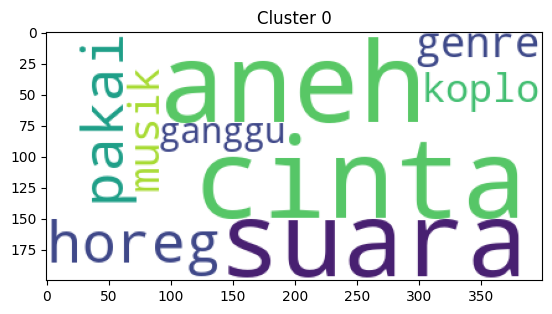

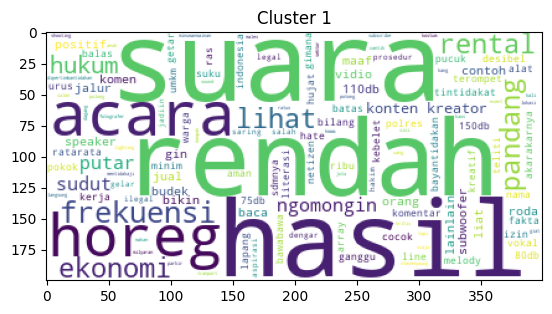

In [24]:
for i in range(2):
    word_cloud(i)

## **Topic Modeling**

### **Berdasarkan kata yang sering muncul percluster**

In [25]:
print("Top 10 terms per cluster:") 
order_centroids = model.cluster_centers_.argsort()[:, ::-1] 
terms = vectorizer.get_feature_names_out() 
for i in range(2):    
    print("Cluster %d:" % i, end=' ')
    topic = [terms[ind] for ind in order_centroids[i, :10]]
    print(' '.join(topic))


Top 10 terms per cluster:
Cluster 0: orang langsung ganggu lapang jawa bangga warga bang rumah hobi
Cluster 1: suara horeg suka orang sewa warga jawa malang karnaval ganggu


Interpretasi Topik untuk setiap cluster:<br>
Cluster 0 : "Perasaan warga terhadap acara di lapangan atau lingkungan komunitas."<br>
Cluster 1 : "Pandangan warga terhadap acara karnaval atau kegiatan yang ramai di lingkungan."

Kesimpulan Umum:<br>
Cluster 0 berfokus pada pengalaman umum warga di komunitas terkait lapangan atau gangguan dalam lingkungan tempat tinggal mereka.<br>
Cluster 1 lebih spesifik ke acara yang bersifat ramai, seperti karnaval, dengan berbagai reaksi dari warga (suka atau terganggu).

### **LatentDirichletAllocation (LDA)**

In [26]:
lda = LatentDirichletAllocation(n_components=2, random_state=1)
lda.fit(countsv)

terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topik {i + 1}: {', '.join([terms[j] for j in topic.argsort()[:-11:-1]])}")

Topik 1: horeg, suara, langsung, suka, lapang, sewa, masyarakat, ganggu, rendah, karnaval
Topik 2: orang, suara, horeg, jawa, jatim, daerah, budaya, bang, warga, tuju


Interpretasi Topik untuk setiap cluster:<br>
Topik 1 lebih cenderung berbicara tentang gangguan suara dalam konteks acara<br>
Topik 2 lebih berkaitan dengan kebudayaan dan masyarakat lokal, khususnya yang ada di Jawa Timur.

In [27]:
%matplotlib inline
import pyLDAvis, pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [28]:
lda_topic_value = lda.transform(countsv)
df['lda_topics'] = lda_topic_value.argmax(axis=1)

lda_remap = {0:'Horeg Ganggu Masyarakat', 1:'Horeg Budaya Jawa'}
df['lda_topics'] = df['lda_topics'].map(lda_remap)

In [29]:
lda_x = df.lda_topics.value_counts()
print(lda_x)

lda_topics
Horeg Ganggu Masyarakat    281
Horeg Budaya Jawa          219
Name: count, dtype: int64


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

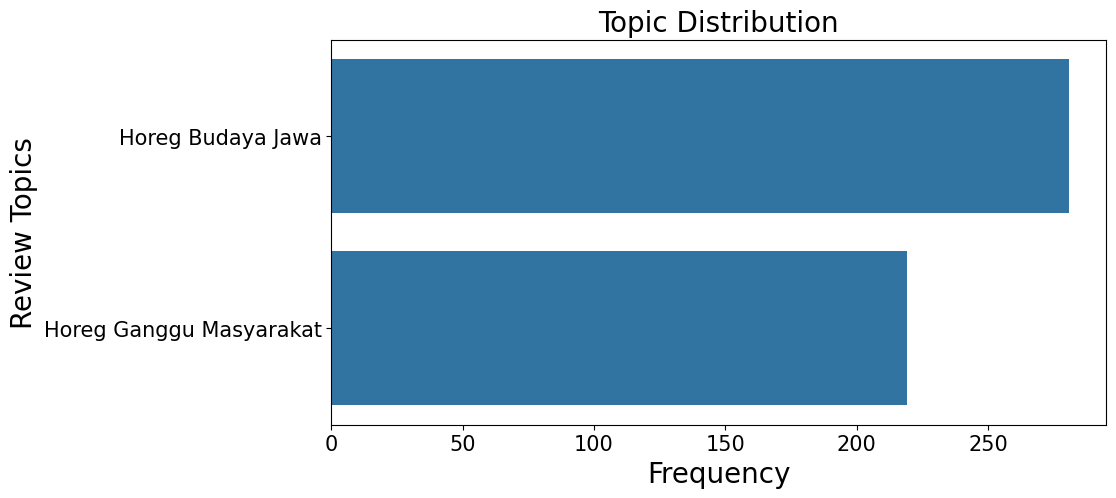

In [30]:
lda_x = df.lda_topics.value_counts()
lda_y = lda_x.sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=lda_x, y=lda_y.index)
plt.title("Topic Distribution", fontsize=20)
plt.ylabel("Review Topics", fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)